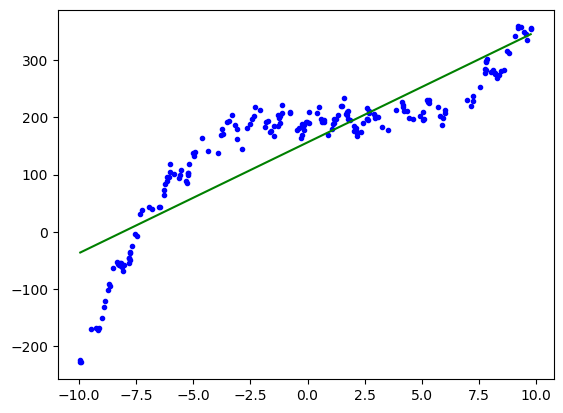

Squared train Error with least squares: 3551.961
Squared test Error with least squares: 3393.095


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f2412dc7e10>

In [1]:
include("example_nonLinear.jl")

# 1.1 other normal equation

In [2]:
function leastSquaresBiasL2(X,y,lambda)

	# Add bias column
	n = size(X,1)
	Z = [ones(n,1) X]

	# Find regression weights minimizing squared error
	v = Z'*((Z*Z' + lambda*I)\y)

	# Make linear prediction function
	predict(Xhat) = [ones(size(Xhat,1),1) Xhat]*v

	# Return model
	return LinearModel(predict,v)
end


leastSquaresBiasL2 (generic function with 1 method)

Squared train Error with least squares: 3551

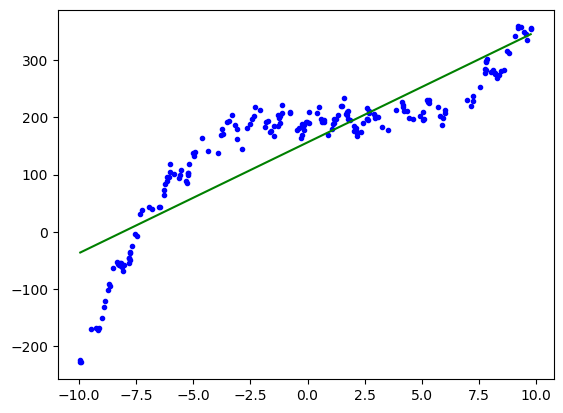

.961
Squared test Error with least squares: 3393.095


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f241265df28>

In [3]:
using Printf
using Statistics

# Load X and y variable
using JLD
data = load("basisData.jld")
(X,y,Xtest,ytest) = (data["X"],data["y"],data["Xtest"],data["ytest"])

# # Fit a least squares model
# include("leastSquares.jl")
lambda = 1
model = leastSquaresBiasL2(X,y,lambda)

# Evaluate training error
yhat = model.predict(X)
trainError = mean((yhat - y).^2)
@printf("Squared train Error with least squares: %.3f\n",trainError)

# Evaluate test error
yhat = model.predict(Xtest)
testError = mean((yhat - ytest).^2)
@printf("Squared test Error with least squares: %.3f\n",testError)

# Plot model
using PyPlot
figure(1)
plot(X,y,"b.")
Xhat = minimum(X):.1:maximum(X)
yhat = model.predict(Xhat[:,:])
plot(Xhat,yhat,"g")


# 1.2

In [4]:
function polyKernel(Xhat, X, p)
    t = size(Xhat, 1)
    n = size(X, 1)
    K = zeros(t, n)
    
    for i in 1:t
        for j in 1:n
            K[i,j] = (1 + Xhat[i,:]' * X[j,:])^p
        end
    end
    return K
end

function leastSquaresPolyL2(X,y,lambda,p)

	# Add bias column
	n = size(X,1)
    
    K = polyKernel(X, X, p)
    
	# Find regression weights minimizing squared error
	u = (K + lambda*I)\y

	# Make linear prediction function
	function predict(Xhat)
        Khat = polyKernel(Xhat, X, p)
        return Khat * u
    end
	# Return model
	return LinearModel(predict,u)
end


leastSquaresPolyL2 (generic function with 1 method)

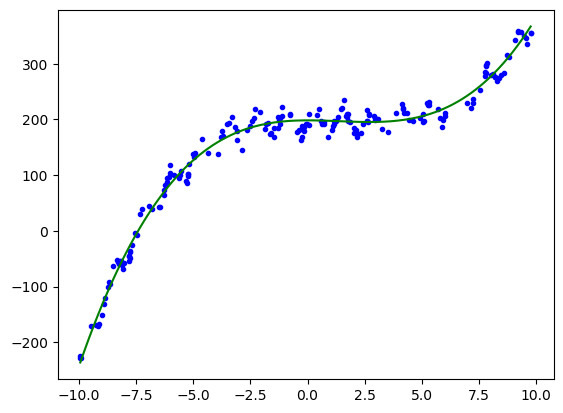

Squared train Error with least squares: 252.014
Squared test Error with least squares: 242.791


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f24125ccba8>

In [5]:
using Printf
using Statistics

# Load X and y variable
using JLD
data = load("basisData.jld")
(X,y,Xtest,ytest) = (data["X"],data["y"],data["Xtest"],data["ytest"])

# # Fit a least squares model
# include("leastSquares.jl")
lambda = 1e-6
p = 3
model = leastSquaresPolyL2(X,y,lambda,p)

# Evaluate training error
yhat = model.predict(X)
trainError = mean((yhat - y).^2)
@printf("Squared train Error with least squares: %.3f\n",trainError)

# Evaluate test error
yhat = model.predict(Xtest)
testError = mean((yhat - ytest).^2)
@printf("Squared test Error with least squares: %.3f\n",testError)

# Plot model
using PyPlot
figure(1)
plot(X,y,"b.")
Xhat = minimum(X):.1:maximum(X)
yhat = model.predict(Xhat[:,:])
plot(Xhat,yhat,"g")


# 1.3

In [6]:
function gaussKernel(Xhat, X, sigma)
    t = size(Xhat, 1)
    n = size(X, 1)
    K = zeros(t, n)
    
    for i in 1:t
        for j in 1:n
            diff = (Xhat[i,:] - X[j,:])
            K[i,j] = exp(- (diff'diff) / (2 * sigma^2 ) )
        end
    end
    return K
end

function leastSquaresGaussL2(X,y,lambda,sigma)

	# Add bias column
	n = size(X,1)
    
    K = gaussKernel(X, X, sigma)
    
	# Find regression weights minimizing squared error
	u = (K + lambda*I)\y

	# Make linear prediction function
	function predict(Xhat)
        Khat = gaussKernel(Xhat, X, sigma)
        return Khat * u
    end
	# Return model
	return LinearModel(predict,u)
end


leastSquaresGaussL2 (generic function with 1 method)

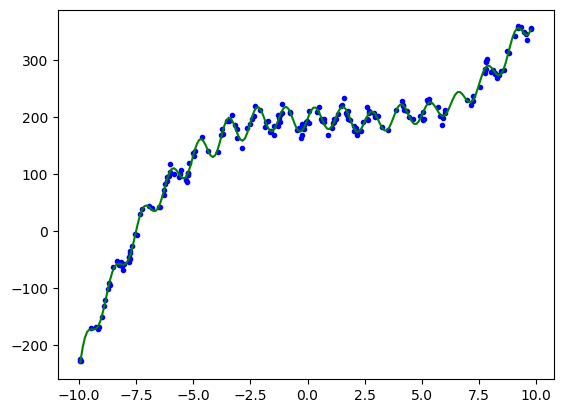

Squared train Error with least squares: 39.163
Squared test Error with least squares: 70.580


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f24125cccf8>

In [7]:
using Printf
using Statistics

# Load X and y variable
using JLD
data = load("basisData.jld")
(X,y,Xtest,ytest) = (data["X"],data["y"],data["Xtest"],data["ytest"])

# # Fit a least squares model
# include("leastSquares.jl")
lambda = 1e-6
sigma = 1
model = leastSquaresGaussL2(X,y,lambda,sigma)

# Evaluate training error
yhat = model.predict(X)
trainError = mean((yhat - y).^2)
@printf("Squared train Error with least squares: %.3f\n",trainError)

# Evaluate test error
yhat = model.predict(Xtest)
testError = mean((yhat - ytest).^2)
@printf("Squared test Error with least squares: %.3f\n",testError)

# Plot model
using PyPlot
figure(1)
plot(X,y,"b.")
Xhat = minimum(X):.1:maximum(X)
yhat = model.predict(Xhat[:,:])
plot(Xhat,yhat,"g")
